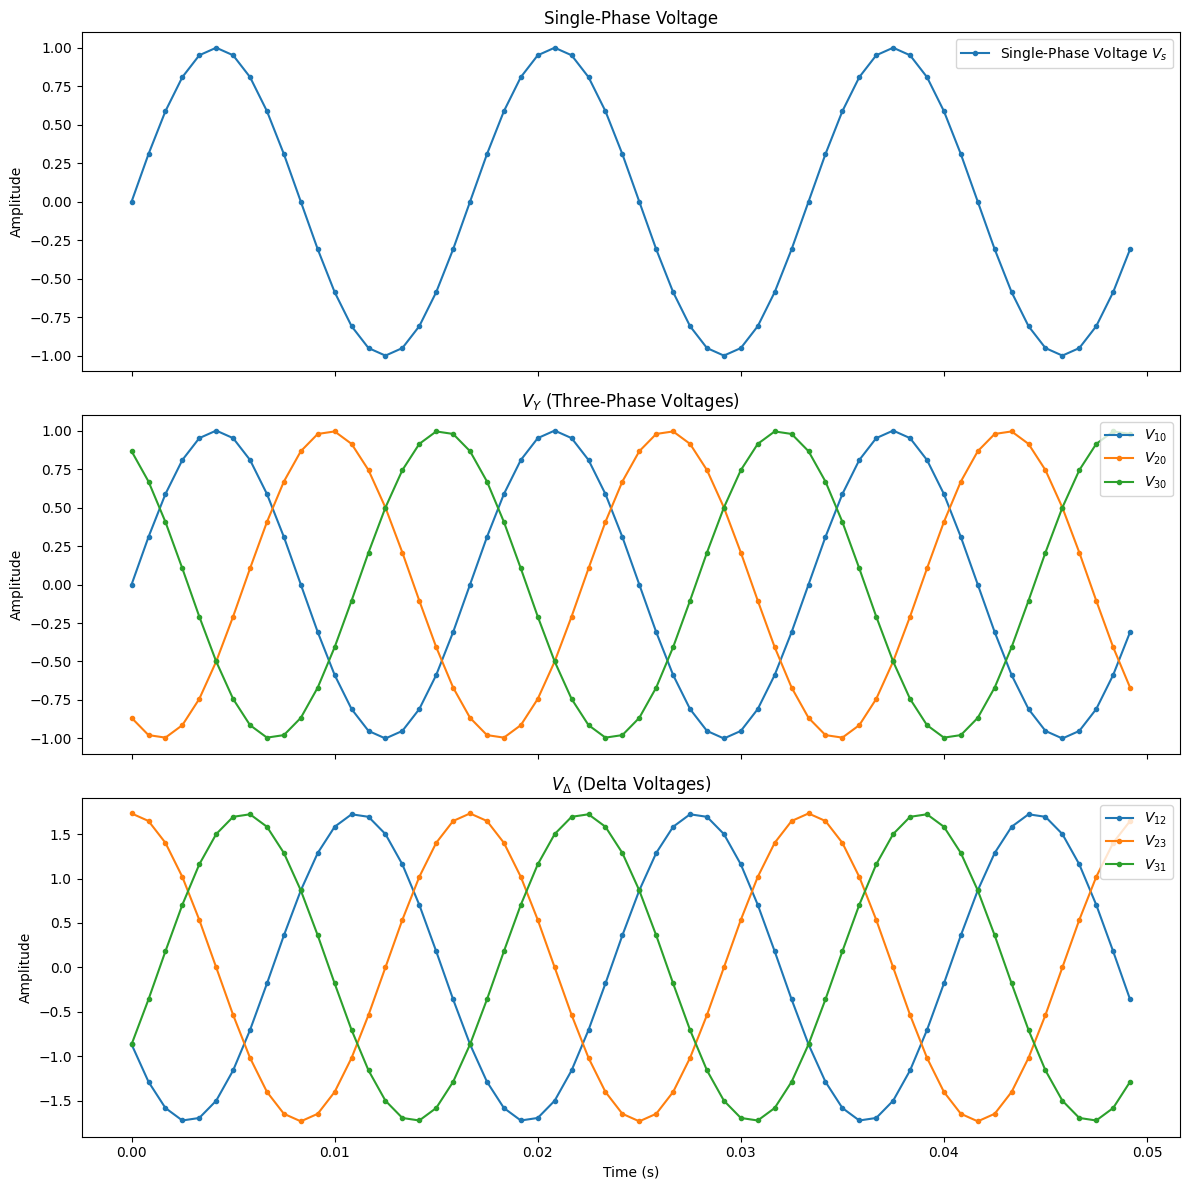

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tf = 0.05  # Duration of the signal in seconds
f = 60      # Frequency of the input signal in Hz
fs = 20 * f # Sampling frequency in Hz
dt = 1 / fs # Time step
N = int(tf / dt) # Number of samples
w = 2 * np.pi * f # Angular frequency
t = np.arange(N) * dt # Time array

# Single-phase input signal
single_phase = np.sin(w * t)

# Phase shifts (120 degrees = 2 * pi / 3 radians)
phase_shifts = [0, -2 * np.pi / 3, -4 * np.pi / 3]

# Generate three-phase outputs
V1 = single_phase
V2 = np.sin(w * t + phase_shifts[1])
V3 = np.sin(w * t + phase_shifts[2])

# Combine into a matrix
V_Y = np.array([V1, V2, V3])

# Define the delta transformation matrix
T = np.array([
    [-1, 1, 0],
    [0, -1, 1],
    [1, 0, -1]
])

# Calculate the delta voltages
V_Delta = T @ V_Y

# Plot the signals
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot the single-phase voltage
ax1.plot(t, single_phase, '.-', label='Single-Phase Voltage $V_s$')
ax1.set_title('Single-Phase Voltage')
ax1.set_ylabel('Amplitude')
ax1.legend(loc='upper right')

# Plot the three-phase Y voltages
for i in range(3):
    ilabel = rf"$V_{{{i+1}0}}$"
    ax2.plot(t, V_Y[i, :], '.-', label=ilabel)
ax2.set_title(r'$V_Y$ (Three-Phase Voltages)')
ax2.set_ylabel('Amplitude')
ax2.legend(loc='upper right')

# Plot the Delta-phase voltages
for i in range(3):
    ilabel = rf"$V_{{{(i % 3)+1}{((i+1) % 3)+1}}}$"
    ax3.plot(t, V_Delta[i, :], '.-', label=ilabel)
ax3.set_title(r'$V_\Delta$ (Delta Voltages)')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()
